In [ ]:
# !pip install seirsplus

t = 0.21
t = 10.03
[Checkpoint: Updating parameters]
t = 20.04
t = 30.16
t = 40.01
t = 50.12
t = 60.22
t = 70.04
t = 80.02
t = 90.12
[Checkpoint: Updating parameters]
t = 100.01
t = 110.10
t = 120.01
t = 130.01
t = 140.04
t = 150.03
t = 160.01
t = 170.01
t = 180.01
t = 190.02
t = 200.00
t = 210.01
t = 220.03
t = 230.02
t = 240.01
t = 250.00
t = 260.01
t = 270.04
t = 280.01
t = 290.00
t = 300.02


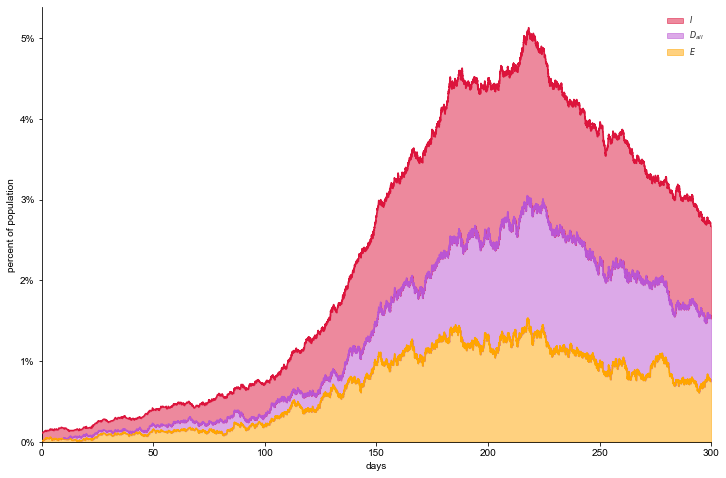

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x252832dda08>)

In [11]:
from seirsplus.models import *
import networkx

numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)
G_normal     = custom_exponential_graph(baseGraph, scale=100)
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)

model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0.02, theta_I=0.02, phi_E=0.2, phi_I=0.2, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=10)

checkpoints = {'t': [20, 100], 'G': [G_distancing, G_normal], 'p': [0.1, 0.5], 'theta_E': [0.02, 0.02], 'theta_I': [0.02, 0.02], 'phi_E':   [0.2, 0.2], 'phi_I':   [0.2, 0.2]}

model.run(T=300, checkpoints=checkpoints)

model.figure_infections()